<a href="https://www.kaggle.com/code/kapusharinka/network-anomaly-detection-unsupervised?scriptVersionId=151808139" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [186]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/network-intrusion-detection/Train_data.csv
/kaggle/input/network-intrusion-detection/Test_data.csv


# Network Anomaly Detection
https://en.wikipedia.org/wiki/Anomaly_detection#Popular_techniques</br>
https://medium.com/@AmyGrabNGoInfo/list/imbalanced-classification-and-anomalies-detection-dc908de4382d</br>
https://youtube.com/playlist?list=PLVppujud2yJo0qnXjWVAa8h7fxbFJHtfJ&feature=shared

## Data preprocessing and overview
Dataset is taken from here: https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection. It is based on [KDD-Cup '99](https://www.kdd.org/kdd-cup/view/kdd-cup-1999/Data).

In [187]:
train = pd.read_csv('/kaggle/input/network-intrusion-detection/Train_data.csv')
test = pd.read_csv('/kaggle/input/network-intrusion-detection/Test_data.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

### List of columns

#### BASIC FEATURES OF EACH NETWORK CONNECTION VECTOR
1. Duration: Length of time duration of the connection
1. Protocol_type: Protocol used in the connection
1. Service: Destination network service used
1. Flag: Status of the connection – Normal or Error
1. Src_bytes: Number of data bytes transferred from source to destination in single connection
1. Dst_bytes: Number of data bytes transferred from destination to source in single connection
1. Land: if source and destination IP addresses and port numbers are equal then, this variable takes value 1 else 0
1. Wrong_fragment: Total number of wrong fragments in this connection
1. Urgent: Number of urgent packets in this connection. Urgent packets are packets with the urgent bit activated
#### CONTENT RELATED FEATURES OF EACH NETWORK CONNECTION VECTOR
1. Hot: Number of „hot‟ indicators in the content such as: entering a system directory, creating programs and executing programs
1. Num_failed_logins: Count of failed login attempts
1. Logged_in Login Status: 1 if successfully logged in; 0 otherwise
1. Num_compromised: Number of compromised' ' conditions 
1. Root_shell: 1 if root shell is obtained; 0 otherwise 
1. Su_attempted: 1 ifsu root'' command attempted or used; 0 otherwise
1. Num_root: Number of root'' accesses or number of operations performed as a root in the connection 
1. Num_file_creations: Number of file creation operations in the connection 
1. Num_shells: Number of shell prompts 
1. Num_access_files: Number of operations on access control files 
1. Num_outbound_cmds: Number of outbound commands in an ftp session 
1. Is_hot_login: 1 if the login belongs to thehot'' list i.e., root or admin; else 0
1. Is_guest_login: 1 if the login is a guest, 0 otherwise
#### TIME RELATED TRAFFIC FEATURES OF EACH NETWORK CONNECTION VECTOR
1. Count: Number of connections to the same destination host as the current connection in the past two seconds
1. Srv_count: Number of connections to the same service (port number) as the current connection in th e past two seconds
1. Serror_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in count (23)
1. Srv_serror_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in srv_count (24)
1. Rerror_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in count (23)
1. Srv_rerror_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in srv_count (24)
1. Same_srv_rate: The percentage of connections that were to the same service, among the connections aggregated in count (23)
1. Diff_srv_rate: The percentage of connections that were to different services, among the connections aggregated in count (23)
1. Srv_diff_host_ rate: The percentage of connections that were to different destination machines among the connections aggregated in srv_count (24)
#### HOST BASED TRAFFIC FEATURES IN A NETWORK CONNECTION VECTOR
1. Dst_host_count: Number of connections having the same destination host IP address
1. Dst_host_srv_ count: Number of connections having the same port number
1. Dst_host_same srv_rate: The percentage of connections that were to the same service, among the connections aggregated in dst_host_count (32) 
1. Dst_host_diff srv_rate: The percentage of connections that were to different services, among the connections aggregated in dst_host_count (32)
1. Dst_host_same src_port_rate: The percentage of connections that were to the same source port, among the connections aggregated in dst_host_srv_c ount (33) 
1. Dst_host_srv diff_host_rate: The percentage of connections that were to different destination machines, among the connections aggregated in dst_host_srv_count (33)
1. Dst_host_serro r_rate: The percentage of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_count (32)
1. Dst_host_srv_s error_rate: The percent of connections that have activated the flag (4) s0, s1, s2 or s3, among the connections aggregated in dst_host_srv_c ount (33)
1. Dst_host_rerro r_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_count (32)
1. Dst_host_srv_r error_rate: The percentage of connections that have activated the flag (4) REJ, among the connections aggregated in dst_host_srv_c ount (33)

In [188]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [189]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [190]:
train.describe(include='object')

,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


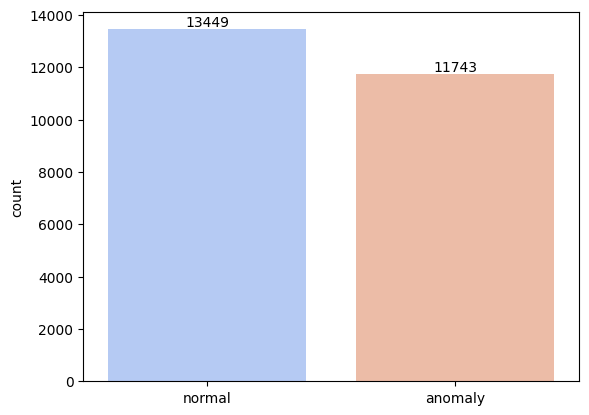

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=train["class"], palette=("coolwarm"))
abs_values = train["class"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
ax.set_xticklabels(['normal', 'anomaly'])

plt.xlabel(None)
plt.show()

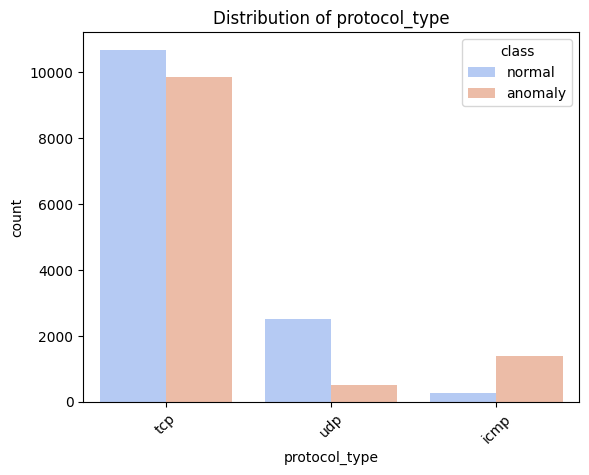

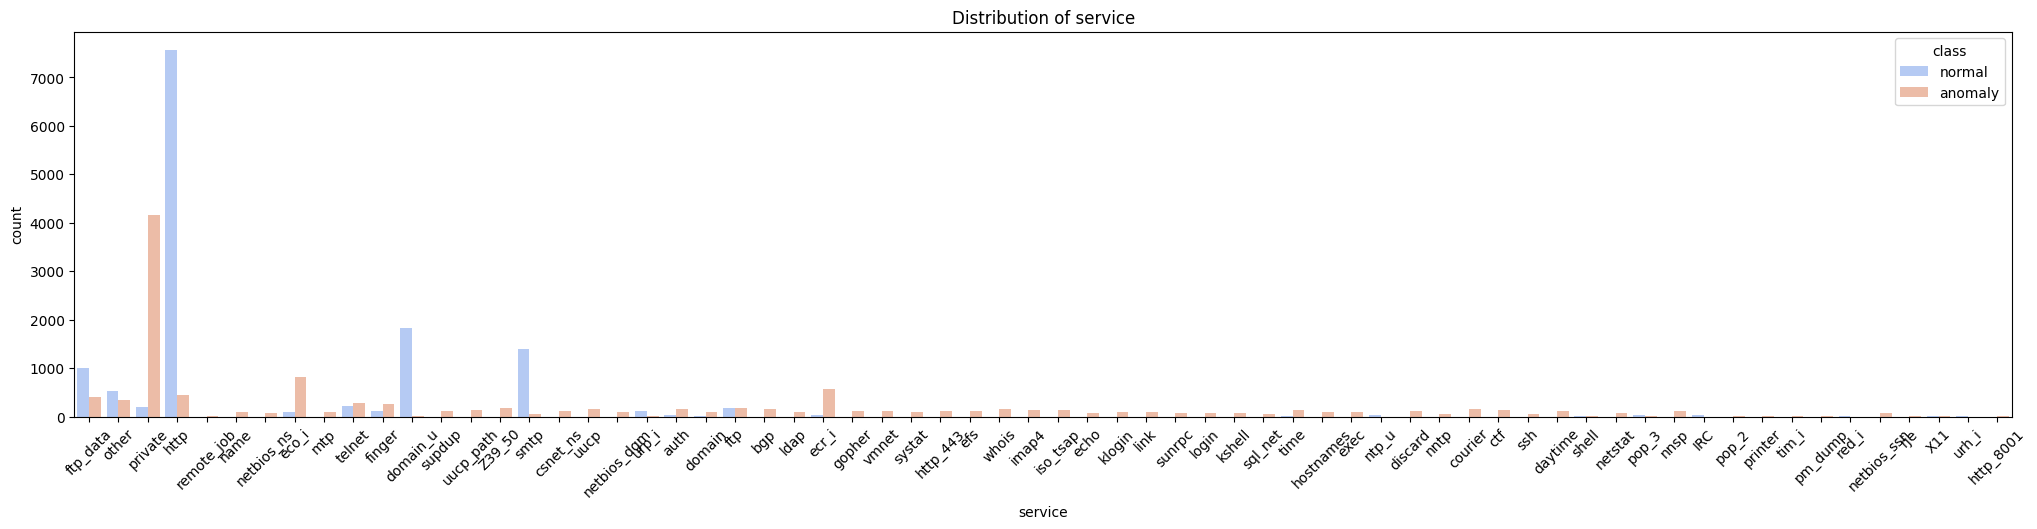

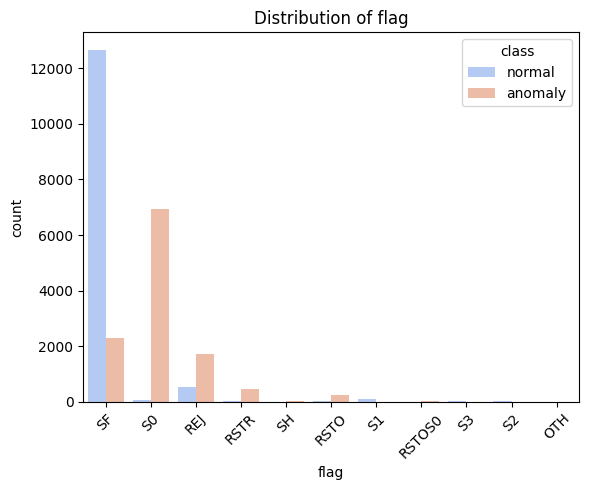

In [192]:
# categorical columns
for category in ['protocol_type', 'service', 'flag']:
    if category == 'service':
        plt.figure(figsize=(25, 5))
    sns.countplot(x=category, data=train, hue='class', palette=("coolwarm"))
    plt.title(f'Distribution of {category}')
    plt.xticks(rotation=45)
    plt.show()

In [193]:
# remove missing values (NaN)
train.dropna(inplace=True)

# duplicates
print(f"Number of duplicate rows in train: {train.duplicated().sum()}")

Number of duplicate rows in train: 0


### Label encoding
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [194]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

label_encoding(train)
label_encoding(test)

train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


### Correlations

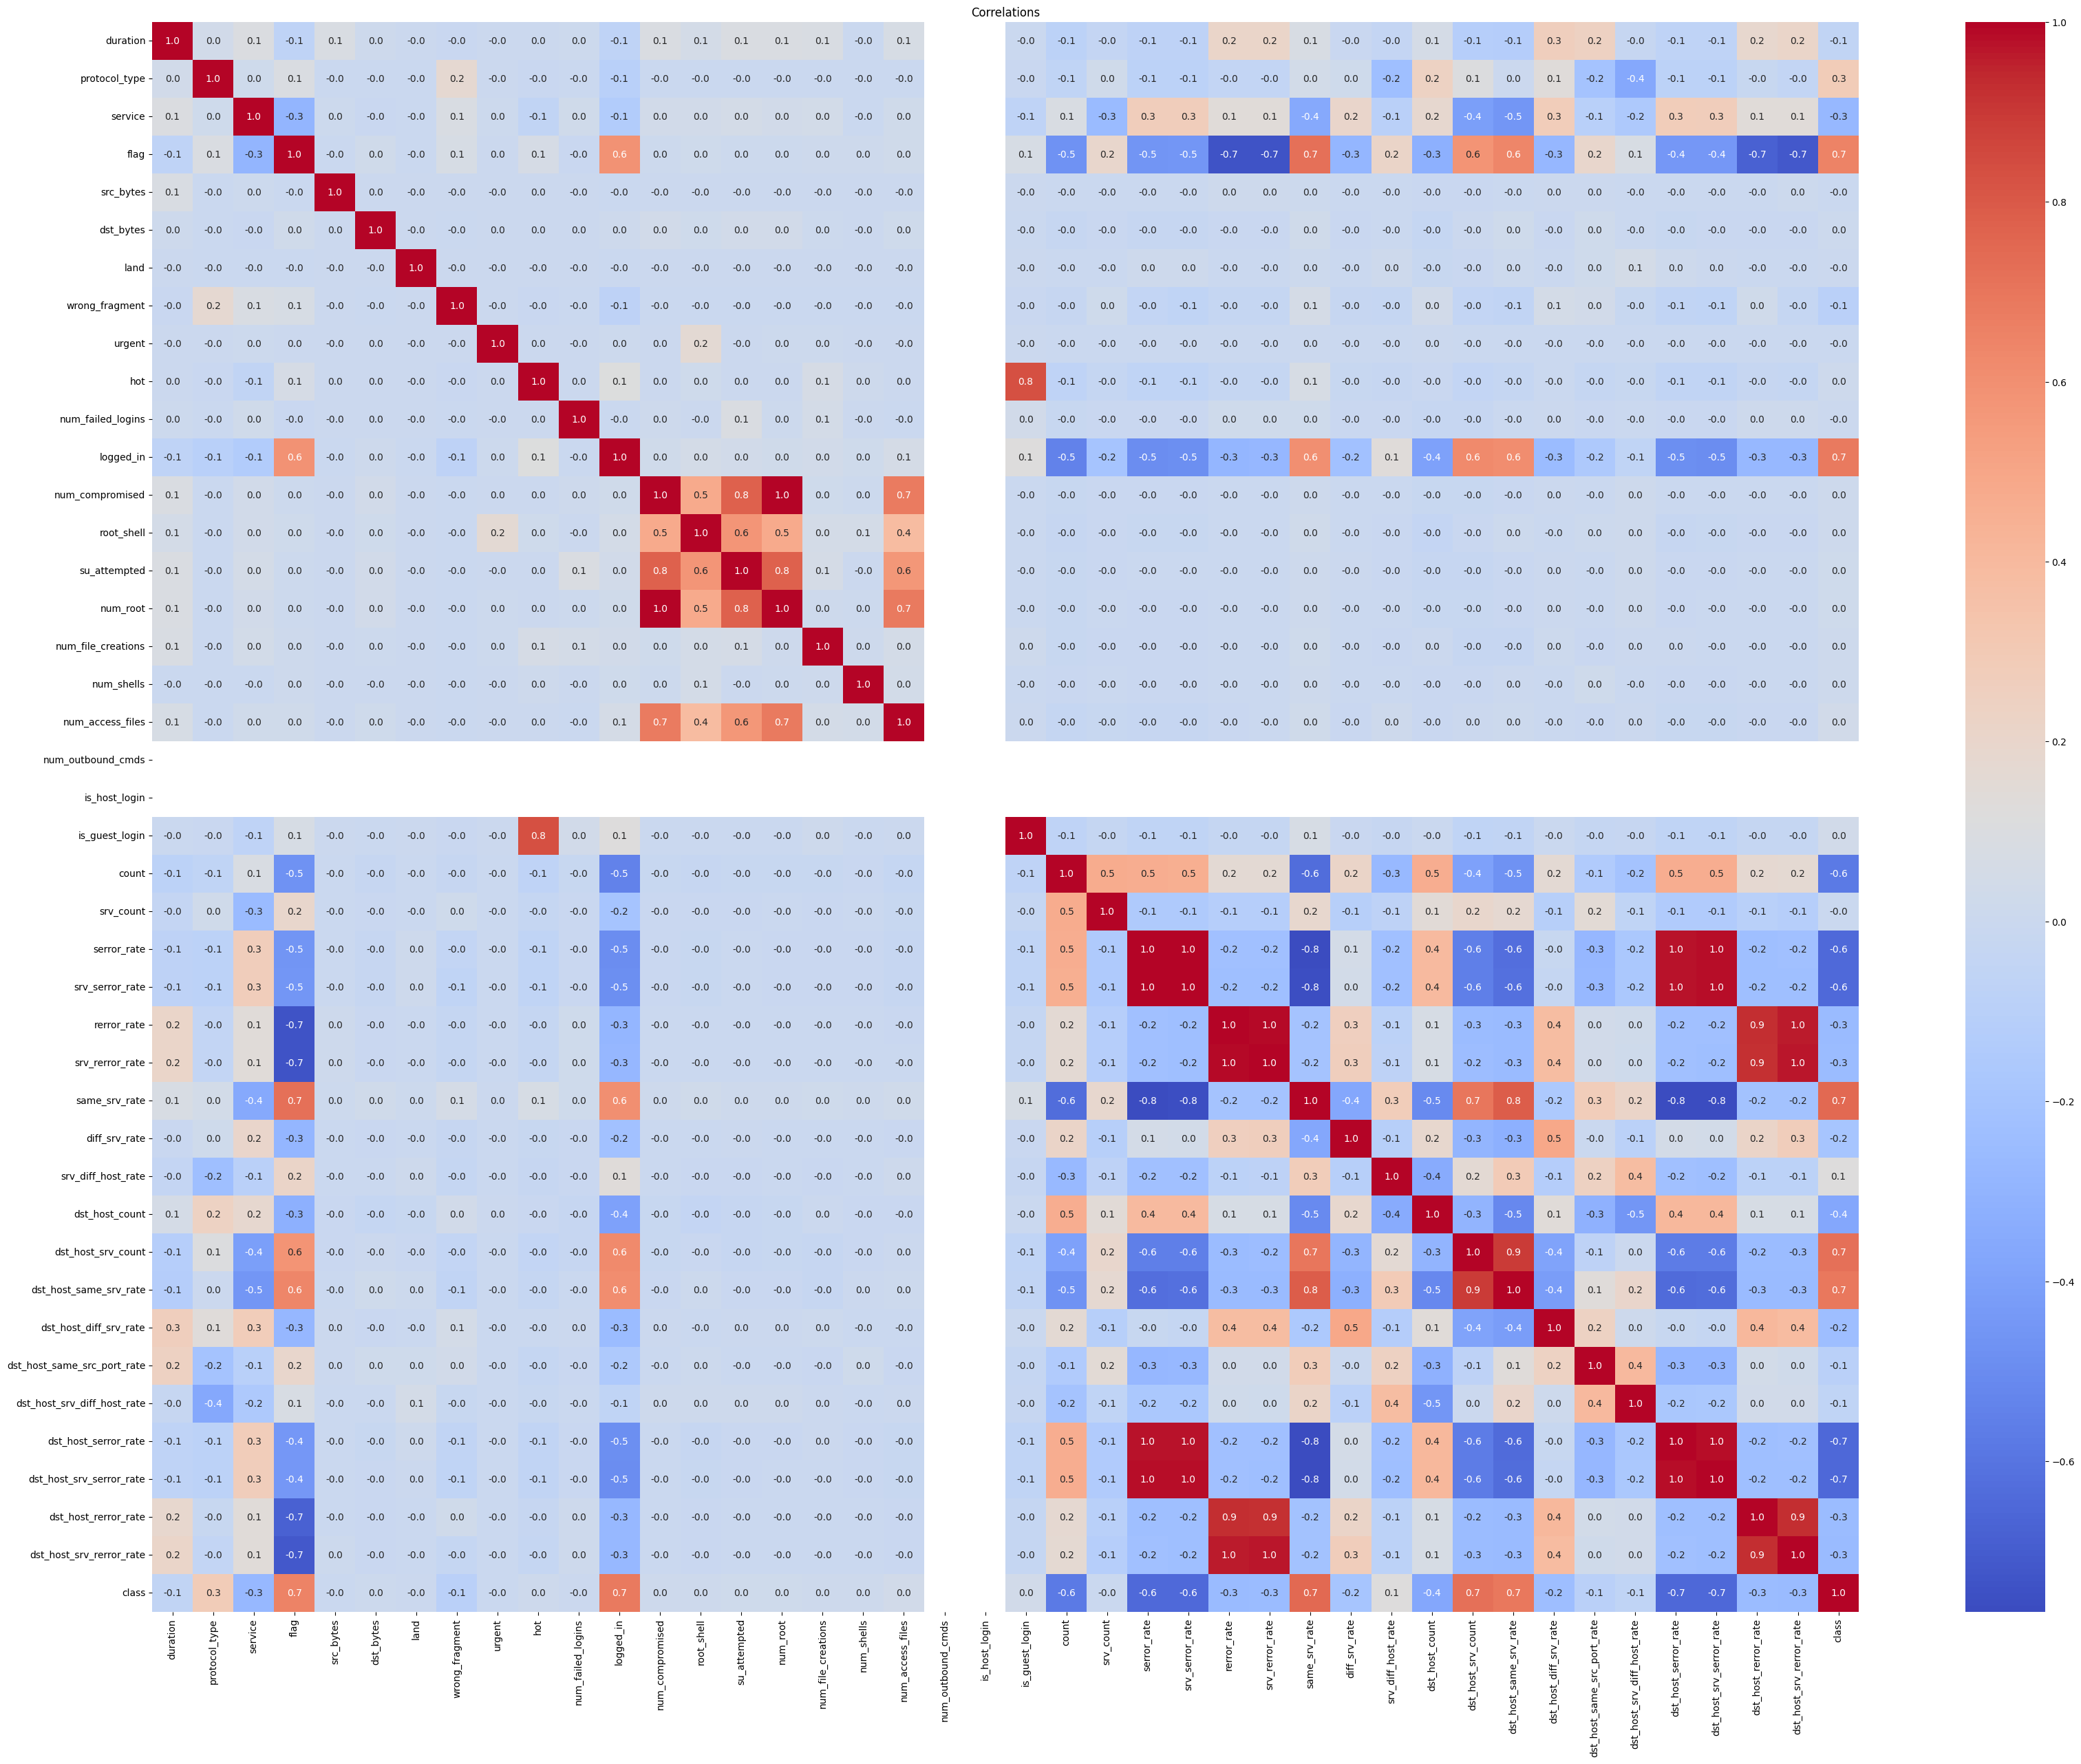

In [195]:
plt.figure(figsize=(40, 30))
sns.heatmap(train.corr(), annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlations')
plt.show()

Index(['flag', 'hot', 'num_compromised', 'su_attempted', 'num_root',
       'is_guest_login', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


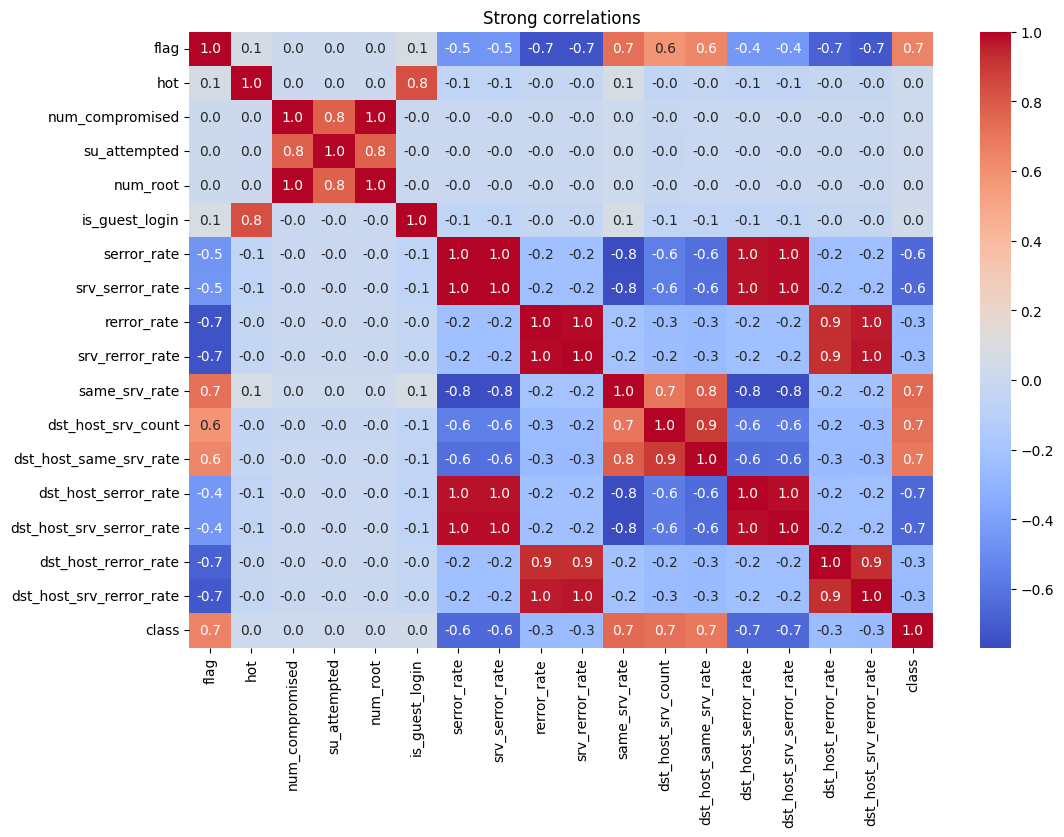

In [196]:
# only strong correlations
corr_matrix = train.corr()
threshold = 0.7

# Create a mask for values above the threshold or below the negative threshold, excluding self-correlation
mask = np.abs(corr_matrix) >= threshold
np.fill_diagonal(mask.values, False)

# Filter the columns and rows based on the mask
filtered_columns = corr_matrix.columns[mask.any()]
filtered_corr = corr_matrix.loc[filtered_columns, filtered_columns]

print(filtered_columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Strong correlations')
plt.show()

### Scale data
Let's use [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html) since it's not so sensitive to outliers like StandardScaler and MinMaxScaler.

In [197]:
X = train.drop(['class'], axis=1)
y = train['class']

In [198]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X = scaler.fit_transform(X)

### PCA

In [199]:
# from sklearn.decomposition import PCA

# pca = PCA().fit(X)  # data_scaled is your standardized data
# cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# # Determine the number of components that explain at least 99.9% of the variance
# n_components = np.where(cumulative_explained_variance >= 0.99999)[0][0] + 1
# n_components

In [200]:
# pca = PCA(n_components=n_components)
# X = pca.fit_transform(X)

### Split data

In [201]:
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X, y, random_state=42, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, random_state=42, test_size=0.5)

### Feature selection
Trying select the most "important" features, it can improve performance further.

In [202]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.feature_selection import RFE

# rfc = RandomForestClassifier()

# rfe = RFE(rfc, n_features_to_select=10)
# rfe = rfe.fit(X_train, y_train)

In [203]:
# bool_idx = np.array([rank == 1 for rank in rfe.ranking_])
# X_train_reduced = X_train[:, bool_idx]

## Supervised models

## Unsupervised models

In [204]:
df = pd.DataFrame(X)
df["class"] = pd.DataFrame(y)
df = df.sample(frac=0.1)

X_sample = df.drop(['class'], axis=1).to_numpy()
y_sample = df['class'].to_numpy()

normal = (y_sample == 1).sum()
anomalies = (y_sample == 0).sum()
print(f'Normal: {normal}, anomalies: {anomalies}')

Normal: 1375, anomalies: 1144


In [205]:
from sklearn.metrics import classification_report, confusion_matrix

def print_stats(predictions, X, y, title):
    # Predict the anomalies
    print(len(predictions[predictions == -1]), " outliers from ", len(predictions))
    print("0 is anomaly, 1 is normal")
    predictions = [0 if p == -1 else 1 for p in predictions]
    print(classification_report(y, predictions))

    conf = confusion_matrix(y_pred=predictions,y_true=y)
    plt.title(title)
    ax= plt.subplot()
    sns.heatmap(conf, annot=True, fmt="", linewidths=2, cmap="Greens")
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Real');
    ax.xaxis.set_ticklabels(['Normal', 'Anomaly']); 
    ax.yaxis.set_ticklabels(['Normal', 'Anomaly']);
    plt.show()

### One-class SVM

In [206]:
# from sklearn.svm import OneClassSVM
# from sklearn.metrics import accuracy_score

# # Hyperparameters grid
# kernel_range = ['linear', 'rbf', 'sigmoid']
# nu_range = [0.1, 0.2, 0.3, 0.4, 0.5]
# gamma_range = ['scale', 'auto']

# # Store results
# best_score = -1
# best_params = {}

# for kernel in kernel_range:
#     for nu in nu_range:
#         for gamma in gamma_range:
#                 model = OneClassSVM(kernel=kernel, nu=nu, gamma=gamma).fit(X_sample)
#                 predictions = model.predict(X_sample)
#                 predictions = [0 if p == -1 else 1 for p in predictions]

#                 score = accuracy_score(y_true=y_sample, y_pred=predictions)
#                 if best_score < score:
#                     best_score = score
#                     best_params = {'kernel': kernel, 'nu': nu, 'gamma': gamma}
                    
#         print("kernel ", kernel, " nu ", nu, " gamma ", gamma)

# print("Best score:", best_score)
# print("Best hyperparameters:", best_params) 

In [207]:
# from sklearn.svm import OneClassSVM
# from sklearn.metrics import accuracy_score

# # Hyperparameters grid
# kernel_range = ['poly']
# nu_range = [0.1, 0.2, 0.3, 0.4, 0.5]
# gamma_range = ['scale', 'auto']

# # Store results
# best_score = -1
# best_params = {}

# for kernel in kernel_range:
#     for nu in nu_range:
#         for gamma in gamma_range:
#             model = OneClassSVM(kernel=kernel, nu=nu, gamma=gamma).fit(X_sample)
#             predictions = model.predict(X_sample)
#             predictions = [0 if p == -1 else 1 for p in predictions]

#             score = accuracy_score(y_true=y_sample, y_pred=predictions)
#             if best_score < score:
#                 best_score = score
#                 best_params = {'kernel': kernel, 'nu': nu, 'gamma': gamma, 'degree': degree}
                    
#         print("kernel ", kernel, " nu ", nu, " gamma ", gamma)

# print("Best score:", best_score)
# print("Best hyperparameters:", best_params) 

7327  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.91      0.71      0.80      9378
           1       0.79      0.94      0.86     10775

    accuracy                           0.84     20153
   macro avg       0.85      0.83      0.83     20153
weighted avg       0.85      0.84      0.83     20153



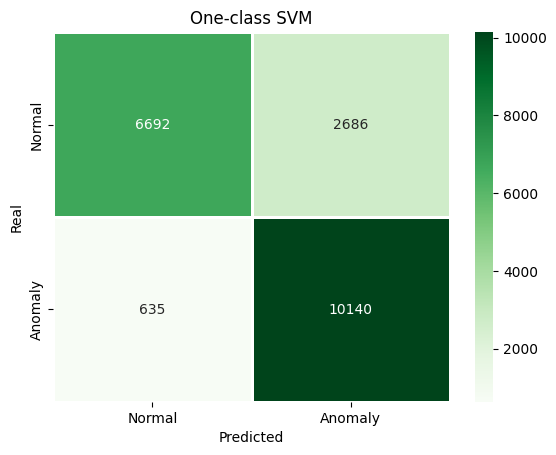

In [208]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel='poly', nu=0.2, gamma='scale').fit(X_train)
predictions = model.predict(X_train)
print_stats(predictions, X_train, y_train, "One-class SVM")

921  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1197
           1       0.78      0.94      0.86      1323

    accuracy                           0.83      2520
   macro avg       0.85      0.83      0.83      2520
weighted avg       0.85      0.83      0.83      2520



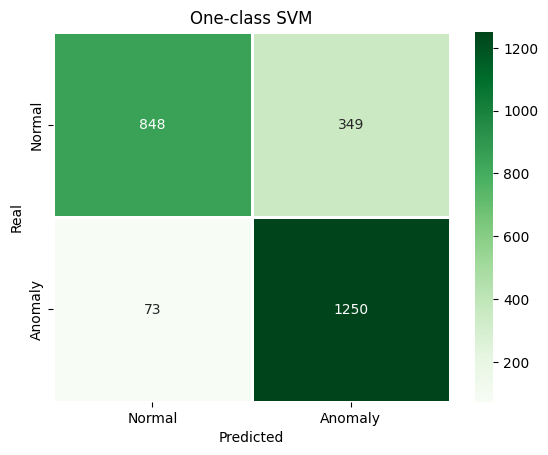

In [209]:
predictions = model.predict(X_test)
print_stats(predictions, X_test, y_test, "One-class SVM")

### Local Outlier Factor

In [210]:
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.metrics import accuracy_score

# # Hyperparameters grid
# n_neighbors_range = range(5, 50)
# algorithm_range = ['ball_tree', 'kd_tree']
# leaf_size_range = range(20, 50)

# # Store results
# best_score = -1
# best_params = {}

# for n_neighbors in n_neighbors_range:
#     for algorithm in algorithm_range:
#         for leaf_size in leaf_size_range:
#             predictions = LocalOutlierFactor(n_neighbors=n_neighbors, algorithm=algorithm, leaf_size=leaf_size).fit_predict(X_sample)
#             predictions = [0 if p == -1 else 1 for p in predictions]

#             score = accuracy_score(y_true=y_sample, y_pred=predictions)
#             if best_score < score:
#                 best_score = score
#                 best_params = {'n_neighbors': n_neighbors, 'algorithm': algorithm, 'leaf_size': leaf_size}

#         print(f"n_neighbors: {n_neighbors}, algorithm: {algorithm}")

# print("Best score:", best_score)
# print("Best hyperparameters:", best_params)

In [211]:
# from sklearn.neighbors import LocalOutlierFactor
# from sklearn.metrics import accuracy_score

# # Hyperparameters grid
# n_neighbors_range = range(5, 50)
# algorithm_range = ['auto', 'brute']

# # Store results
# best_score = -1
# best_params = {}

# for n_neighbors in n_neighbors_range:
#     for algorithm in algorithm_range:
#         predictions = LocalOutlierFactor(n_neighbors=n_neighbors, algorithm=algorithm, leaf_size=leaf_size).fit_predict(X_sample)
#         predictions = [0 if p == -1 else 1 for p in predictions]

#         score = accuracy_score(y_true=y_sample, y_pred=predictions)
#         if best_score < score:
#             best_score = score
#             best_params = {'n_neighbors': n_neighbors, 'algorithm': algorithm}

#         print(f"n_neighbors: {n_neighbors}, algorithm: {algorithm}")

# print("Best score:", best_score)
# print("Best hyperparameters:", best_params)

1156  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.35      0.04      0.08      9378
           1       0.53      0.93      0.67     10775

    accuracy                           0.52     20153
   macro avg       0.44      0.49      0.38     20153
weighted avg       0.45      0.52      0.40     20153



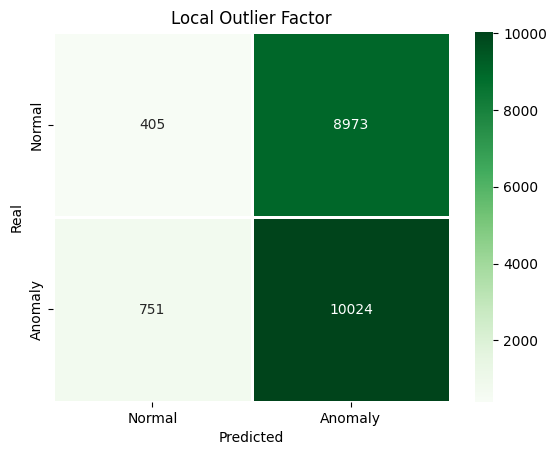

In [212]:
from sklearn.neighbors import LocalOutlierFactor

predictions = LocalOutlierFactor(n_neighbors=20, algorithm='auto').fit_predict(X_train)
print_stats(predictions, X_train, y_train, "Local Outlier Factor")

315  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.45      0.12      0.19      1197
           1       0.52      0.87      0.65      1323

    accuracy                           0.51      2520
   macro avg       0.49      0.49      0.42      2520
weighted avg       0.49      0.51      0.43      2520



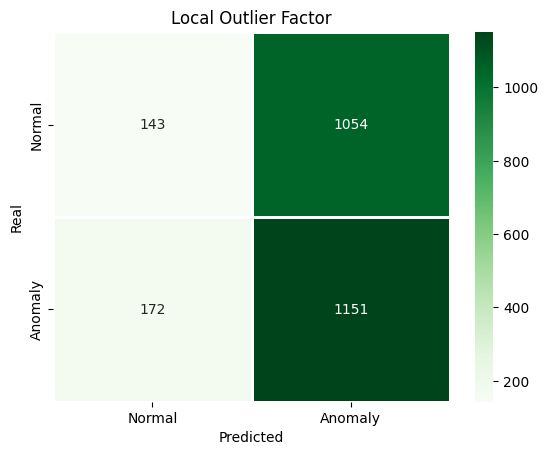

In [213]:
predictions = LocalOutlierFactor(n_neighbors=20, algorithm='auto').fit_predict(X_test)
print_stats(predictions, X_test, y_test, "Local Outlier Factor")

### Isolation Forest

In [214]:
# from sklearn.ensemble import IsolationForest
# from sklearn.metrics import accuracy_score

# # Hyperparameters grid
# n_estimators_range = range(100, 500, 10)
# max_features_range = range(1, 42)

# # Store results
# best_score = -1
# best_params = {}

# for n_estimators in n_estimators_range:
#     for max_features in max_features_range:
#         model = IsolationForest(n_estimators=n_estimators, max_features=max_features).fit(X_sample)
#         predictions = model.predict(X_sample)
#         predictions = [0 if p == -1 else 1 for p in predictions]

#         score = accuracy_score(y_true=y_sample, y_pred=predictions)
#         if best_score < score:
#             best_score = score
#             best_params = {'n_estimators': n_estimators, 'max_features': max_features}
#     print('n_estimators ', n_estimators)

# print("Best score:", best_score)
# print("Best hyperparameters:", best_params) 

In [215]:
# from sklearn.ensemble import IsolationForest
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200, 300, 400],
#     'max_samples': [0.25, 0.5, 0.75, 1.0, 'auto'],
#     'contamination': [float(np.sum(y_train==0))/len(y_train), 'auto'],
#     'max_features': [0.25, 0.5, 0.75, 1.0]
# }

# # Initialize the model
# iso_forest = IsolationForest(random_state=42)

# # Initialize Grid Search
# grid_search = GridSearchCV(iso_forest, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Print the best parameters
# print("Best parameters:", grid_search.best_params_)

9377  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.66      0.66      0.66      9378
           1       0.70      0.70      0.70     10775

    accuracy                           0.68     20153
   macro avg       0.68      0.68      0.68     20153
weighted avg       0.68      0.68      0.68     20153



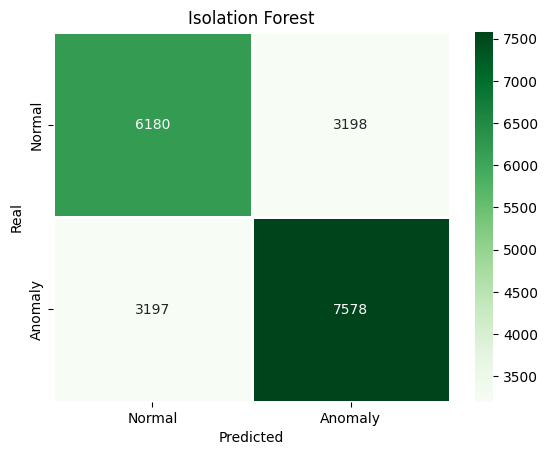

In [216]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=50, max_samples='auto', max_features=0.5, contamination=float(np.sum(y_train==0))/len(y_train), random_state=42, n_jobs=-1).fit(X_train)
predictions = model.predict(X_train)
print_stats(predictions, X_train, y_train, "Isolation Forest")

1178  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.68      0.67      0.68      1197
           1       0.71      0.72      0.71      1323

    accuracy                           0.70      2520
   macro avg       0.69      0.69      0.69      2520
weighted avg       0.70      0.70      0.70      2520



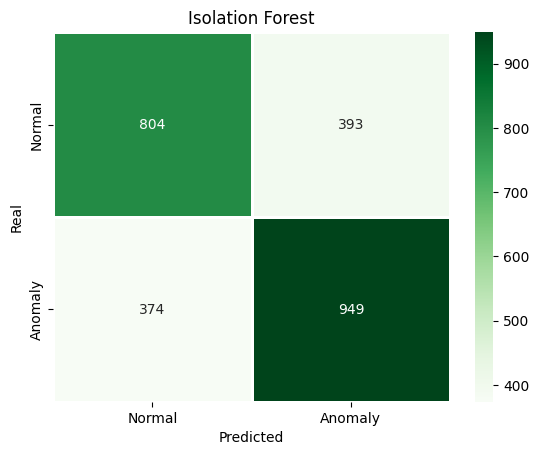

In [217]:
predictions = model.predict(X_test)
print_stats(predictions, X_test, y_test, "Isolation Forest")

### Gaussian Mixture Model

In [218]:
# from sklearn.mixture import GaussianMixture
# from sklearn.metrics import accuracy_score

# # Hyperparameters grid
# n_components_range = [1, 2, 3, 4, 5]
# covariance_type_range = ['full', 'tied', 'diag', 'spherical']
# n_init_range = [1, 2, 3]

# # Store results
# best_score = -1
# best_params = {}
# best_threshold = None

# for n_components in n_components_range:
#     for covariance_type in covariance_type_range:
#         for n_init in n_init_range:
#             model = GaussianMixture(n_components=n_components, covariance_type=covariance_type, n_init=n_init, random_state=42).fit(X_train)
            
#             scores = model.score_samples(X_train)
#             threshold = np.percentile(scores, 40)
#             predictions = [0 if score < threshold else 1 for score in scores]

#             score = accuracy_score(y_true=y_train, y_pred=predictions)
#             if best_score < score:
#                 best_score = score
#                 best_params = {'n_components': n_components, 'covariance_type': covariance_type, 'n_init': n_init, 'random_state': 42}
#                 best_threshold = threshold
#         print('n_components ', n_components, ' covariance_type ', covariance_type)
                
# print("Best score:", best_score)
# print("Best hyperparameters:", best_params)        
# print("Best threshold:", best_threshold)

8061  outliers from  20153
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.79      0.68      0.73      9378
           1       0.75      0.84      0.79     10775

    accuracy                           0.76     20153
   macro avg       0.77      0.76      0.76     20153
weighted avg       0.77      0.76      0.76     20153



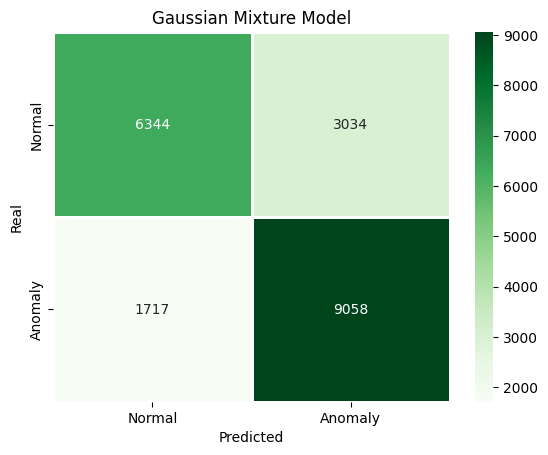

In [219]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4, covariance_type='diag', n_init=2, random_state=42).fit(X_train)
scores = model.score_samples(X_train)
threshold = -2.6819169440951574
predictions = np.array([-1 if score < threshold else 1 for score in scores])
print_stats(predictions, X_train, y_train, "Gaussian Mixture Model")

321  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.62      0.17      0.26      1197
           1       0.55      0.91      0.68      1323

    accuracy                           0.56      2520
   macro avg       0.58      0.54      0.47      2520
weighted avg       0.58      0.56      0.48      2520



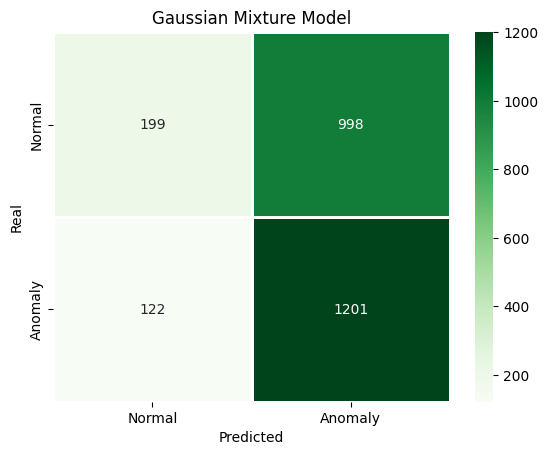

In [220]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4, covariance_type='diag', n_init=2, random_state=42).fit(X_test)
scores = model.score_samples(X_test)
threshold = -2.6819169440951574
predictions = np.array([-1 if score < threshold else 1 for score in scores])
print_stats(predictions, X_test, y_test, "Gaussian Mixture Model")

## Feedforward neural network

In [221]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(units=1, activation='sigmoid')
    ], name="nn_model")

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
284/284 [==============================] - 2s 3ms/step - loss: 45.1660 - accuracy: 0.7927 - val_loss: 1.3995 - val_accuracy: 0.9375
Epoch 2/10
284/284 [==============================] - 1s 2ms/step - loss: 6.7009 - accuracy: 0.8978 - val_loss: 0.3340 - val_accuracy: 0.9499
Epoch 3/10
284/284 [==============================] - 1s 2ms/step - loss: 3.8212 - accuracy: 0.9162 - val_loss: 0.1675 - val_accuracy: 0.9554
Epoch 4/10
284/284 [==============================] - 1s 2ms/step - loss: 2.3977 - accuracy: 0.9317 - val_loss: 0.1507 - val_accuracy: 0.9568
Epoch 5/10
284/284 [==============================] - 1s 2ms/step - loss: 3.2535 - accuracy: 0.9382 - val_loss: 0.5249 - val_accuracy: 0.9618
Epoch 6/10
284/284 [==============================] - 1s 2ms/step - loss: 4.6187 - accuracy: 0.9451 - val_loss: 0.1048 - val_accuracy: 0.9623
Epoch 7/10
284/284 [==============================] - 1s 3ms/step - loss: 11.8669 - accuracy: 0.9465 - val_loss: 0.2299 - val_accuracy: 0.9578
Epoc

79/79 [==============================] - 0s 1ms/step
0  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1197
           1       0.53      1.00      0.69      1323

    accuracy                           0.53      2520
   macro avg       0.26      0.50      0.34      2520
weighted avg       0.28      0.53      0.36      2520



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


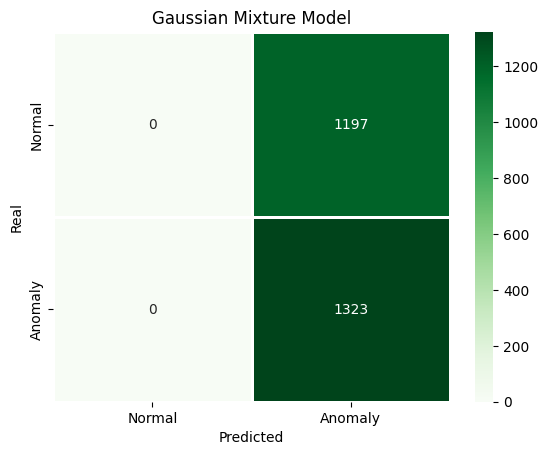

In [222]:
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")
print_stats(y_pred_classes, X_test, y_test, "Gaussian Mixture Model")

## Autoencoder
https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*MMRDQ4g3QvQNc7iJsKM9pg@2x.png" width="800"/>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png" width="800"/>

In [223]:
import tensorflow as tf
from tensorflow.keras import layers, losses

# Keep only the normal data for the training dataset
X_train_normal = X_train[y_train == 1]
X_valid_normal = X_valid[y_valid == 1]

# Input layer
input = tf.keras.layers.Input(shape=(41,))

# Encoder layers
encoder = tf.keras.Sequential([
  layers.Dense(32, activation='relu'),
  layers.Dense(16, activation='relu'),
  layers.Dense(8, activation='relu'),
  layers.Dense(4, activation='relu')])(input)

# Decoder layers
decoder = tf.keras.Sequential([
      layers.Dense(8, activation='relu'),
      layers.Dense(16, activation='relu'),
      layers.Dense(32, activation='relu'),
      layers.Dense(41, activation="sigmoid")])(encoder)

# Create the autoencoder
autoencoder = tf.keras.Model(inputs=input, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mae')
history = autoencoder.fit(X_train_normal, X_train_normal, 
                          epochs=20, 
                          batch_size=256,
                          validation_data=(X_valid_normal, X_valid_normal),
                          shuffle=True)

Epoch 1/20
43/43 [==============================] - 2s 8ms/step - loss: 6.2683 - val_loss: 6.3993
Epoch 2/20
43/43 [==============================] - 0s 4ms/step - loss: 6.0306 - val_loss: 6.1784
Epoch 3/20
43/43 [==============================] - 0s 3ms/step - loss: 5.9382 - val_loss: 6.1628
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 5.9322 - val_loss: 6.1600
Epoch 5/20
43/43 [==============================] - 0s 3ms/step - loss: 5.9292 - val_loss: 6.1591
Epoch 6/20
43/43 [==============================] - 0s 3ms/step - loss: 5.9283 - val_loss: 6.1583
Epoch 7/20
43/43 [==============================] - 0s 4ms/step - loss: 5.9280 - val_loss: 6.1585
Epoch 8/20
43/43 [==============================] - 0s 4ms/step - loss: 5.9279 - val_loss: 6.1578
Epoch 9/20
43/43 [==============================] - 0s 3ms/step - loss: 5.9283 - val_loss: 6.1581
Epoch 10/20
43/43 [==============================] - 0s 4ms/step - loss: 5.9274 - val_loss: 6.1580
Epoch 11/20
43/43 [

79/79 [==============================] - 0s 1ms/step
1797  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.66      0.98      0.79      1197
           1       0.98      0.53      0.69      1323

    accuracy                           0.75      2520
   macro avg       0.82      0.76      0.74      2520
weighted avg       0.82      0.75      0.74      2520



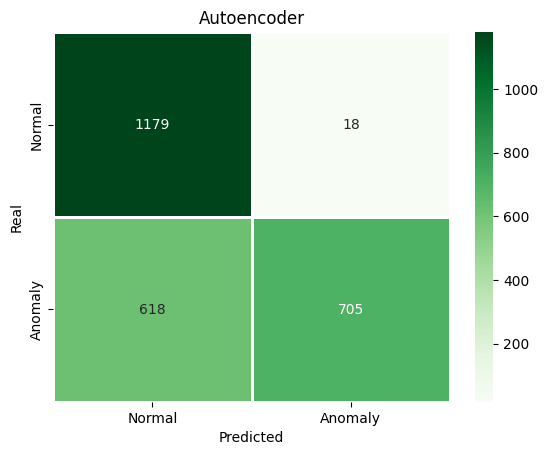

In [224]:
# Calculate MAE loss for validation data
valid_predictions = autoencoder.predict(X_valid_normal)
valid_loss = np.mean(np.abs(valid_predictions - X_valid_normal), axis=1)
threshold = np.percentile(valid_loss, 50)

# Detect anomalies in the test set
test_predictions = autoencoder.predict(X_test)
test_loss = np.mean(np.abs(test_predictions - X_test), axis=1)
test_loss = test_loss.reshape((-1))

predictions = np.array([-1 if loss > threshold else 1 for loss in test_loss])
print_stats(predictions, X_test, y_test, "Autoencoder")

## VAE

In [225]:
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K

# Ensure no NaNs are in the data
np.nan_to_num(X_train_normal, copy=False)
np.nan_to_num(X_valid_normal, copy=False)

original_dim = X_train_normal.shape[1]
latent_dim = 2  # Simplified latent space dimensionality

# Encoder
inputs = layers.Input(shape=(original_dim,))
h = layers.Dense(16, activation='relu', kernel_initializer='he_normal')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)

# Sampling function
def sampling(args):
    z_mean, z_log_sigma = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(z_log_sigma / 2) * epsilon

z = layers.Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_sigma])

# Decoder
decoder_h = layers.Dense(16, activation='relu', kernel_initializer='he_normal')
decoder_mean = layers.Dense(original_dim, activation=None)  # No activation, or 'linear' for non-binary data
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

# VAE model
vae = models.Model(inputs, x_decoded_mean)

# Loss
reconstruction_loss = losses.mean_squared_error(inputs, x_decoded_mean)
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1) * -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)

vae.add_loss(vae_loss)
opt = tf.keras.optimizers.Adam(lr=1e-4, clipvalue=1.0)  # Add gradient clipping
vae.compile(optimizer=opt)

# Callbacks for debugging
callbacks = [
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),  # For monitoring using TensorBoard
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

# Train the VAE
history = vae.fit(
    X_train_normal, 
    shuffle=True, 
    epochs=50, 
    batch_size=32, 
    validation_data=(X_valid_normal, X_valid_normal),
    callbacks=callbacks
)

Epoch 1/50
337/337 [==============================] - 2s 3ms/step - loss: nan - val_loss: nan
Epoch 2/50
337/337 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 3/50
337/337 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 4/50
337/337 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 5/50
337/337 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/50
337/337 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/50
337/337 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/50
337/337 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 9/50
337/337 [==============================] - 1s 3ms/step - loss: nan - val_loss: nan
Epoch 10/50
337/337 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan


79/79 [==============================] - 0s 1ms/step
0  outliers from  2520
0 is anomaly, 1 is normal
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1197
           1       0.53      1.00      0.69      1323

    accuracy                           0.53      2520
   macro avg       0.26      0.50      0.34      2520
weighted avg       0.28      0.53      0.36      2520



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


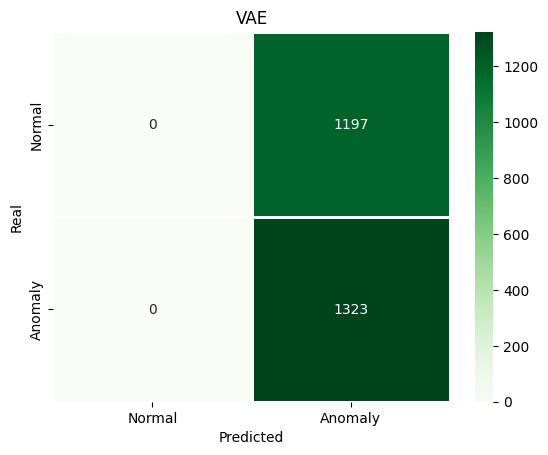

In [226]:
# Calculate MAE loss for validation data
valid_predictions = vae.predict(X_valid_normal)
valid_loss = np.mean(np.abs(valid_predictions - X_valid_normal), axis=1)
threshold = np.percentile(valid_loss, 57)

# Detect anomalies in the test set
test_predictions = vae.predict(X_test)
test_loss = np.mean(np.abs(test_predictions - X_test), axis=1)
test_loss = test_loss.reshape((-1))

predictions = np.array([-1 if loss > threshold else 1 for loss in test_loss])
print_stats(predictions, X_test, y_test, "VAE")